In [1]:
from ga_regression import *
from matplotlib import pyplot as plt
from functools import partial
import PIL
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from pvutils import iter_subplots
from pyvista import PolyData
import pyvista as pv
from scipy.stats import pearsonr

C:\Users\dg\.conda\envs\diffnet4\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
file = Path(r"D:\resynth\run_09_10\run00009_resynth\2025-08-19-10-25-45\opts_and_metadata.pt")
readers = Readers.from_file(file)

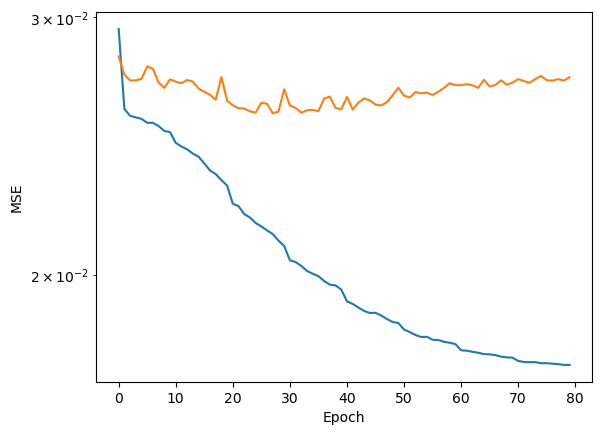

In [7]:
t = readers[0].metadata.opts.trained
orig_reader = Readers.from_file(t.trained_file)[t.idx]
orig_reader.plot_training()

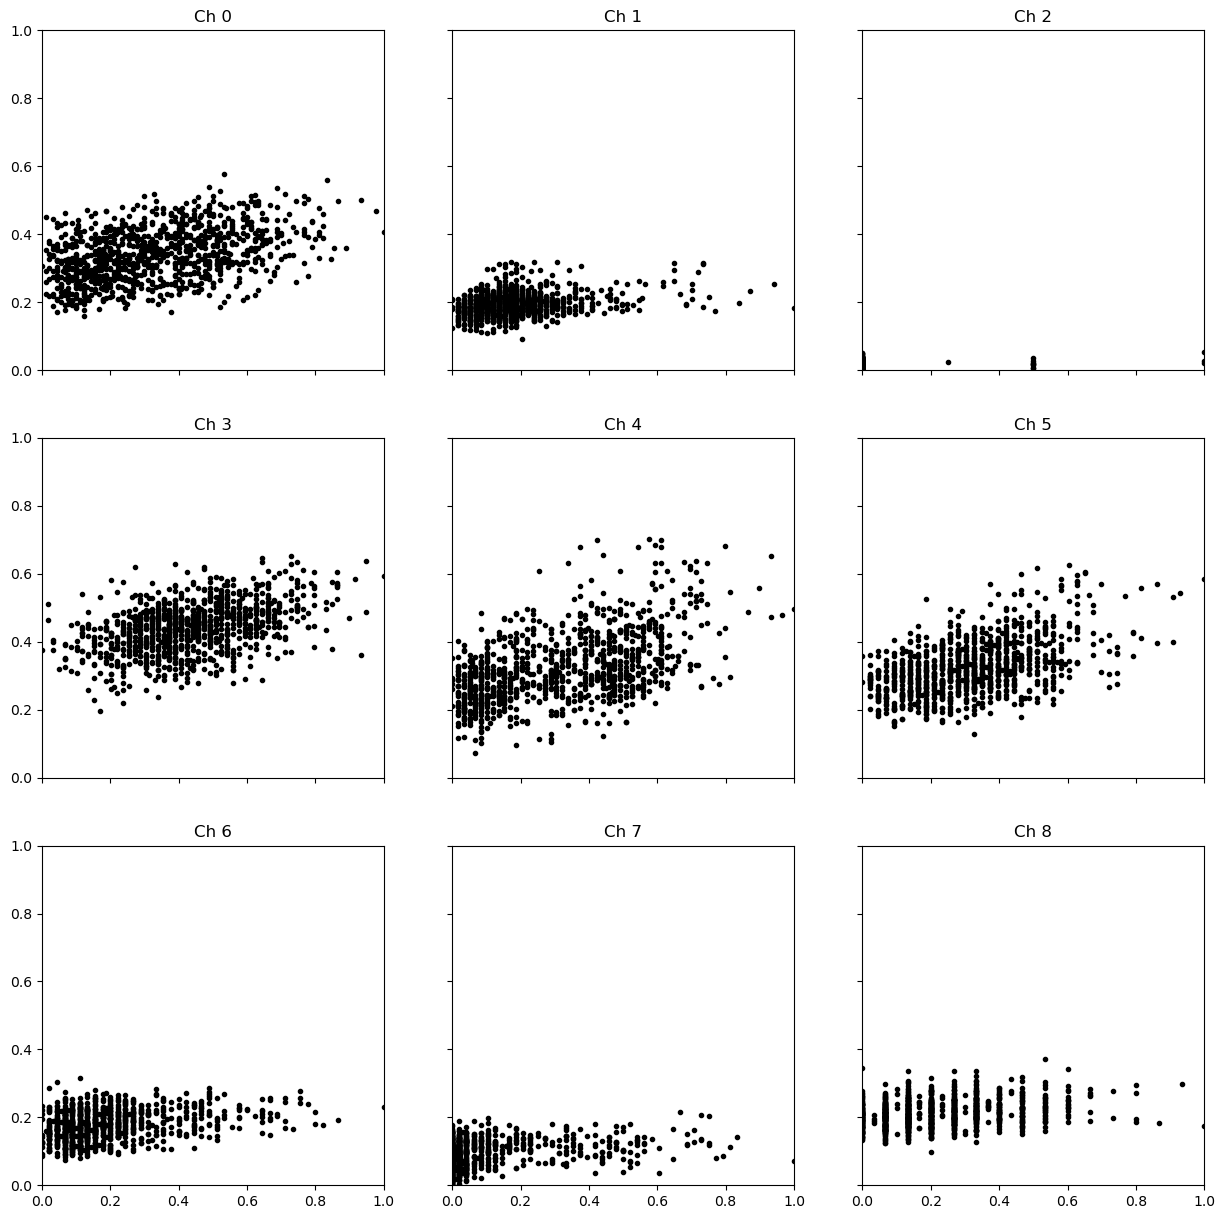

In [8]:
orig_reader.scatter_plots()

In [11]:
sd = orig_reader.scatter_data
from scipy.stats import linregress
from matplotlib import pyplot as plt

self = orig_reader

n_ch = len(self.metadata.channel)
n = int(np.sqrt(n_ch))
fig, axs = plt.subplots(n, n, sharex=True, sharey=True, figsize=(n * 5, n * 5))
axs = axs.reshape(-1)
sd = self.scatter_data

for i, ax in enumerate(axs[:n_ch]):
    lr = linregress(sd.preds[:, i], sd.obs[:, i])
    
    corr_preds = lr.intercept + lr.slope * sd.preds[:, i]
    
    ax.plot(sd.obs[:, i], sd.preds[:, i], 'k.')
    ax.set_title(f'Ch {i}')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

for ax in axs[n_ch:]:
    ax.set_visible(False)


LinregressResult(slope=1.092035105664733, intercept=-0.03622339603601421, rvalue=0.4197476469220462, pvalue=5.409719534397744e-44, stderr=0.07471015191401074, intercept_stderr=0.026051334529764665)

In [12]:
lr = linregress(sd.preds[:, 0], sd.obs[:, 0])

LinregressResult(slope=1.092035105664733, intercept=-0.03622339603601421, rvalue=0.4197476469220462, pvalue=5.409719534397744e-44, stderr=0.07471015191401074, intercept_stderr=0.026051334529764665)

In [ ]:
# NB this plots overall loss
# fig, axs = readers.plot_training(tags=None, mode='loss', legend=(0, .15), sharey=False, figsize=(24, 10))

array([<Axes: title={'center': 'Train (r = 0.71)'}, xlabel='Observed response', ylabel='Predicted response'>,
       <Axes: title={'center': 'Test (r = 0.63)'}, xlabel='Observed response'>],
      dtype=object)

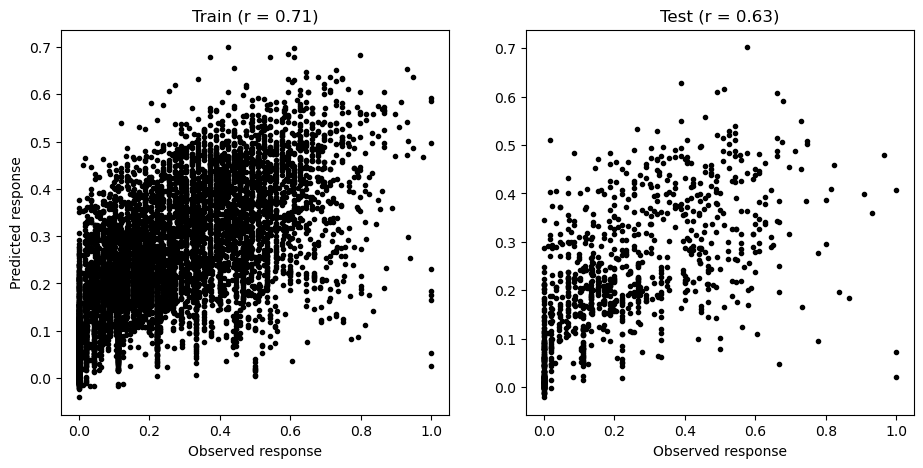

In [6]:
orig_reader.scatter_plot()

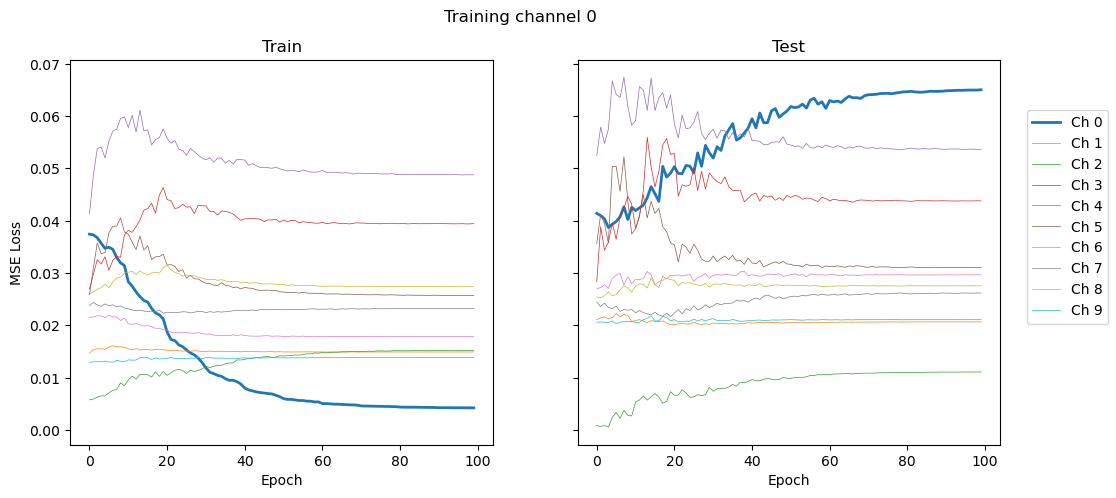

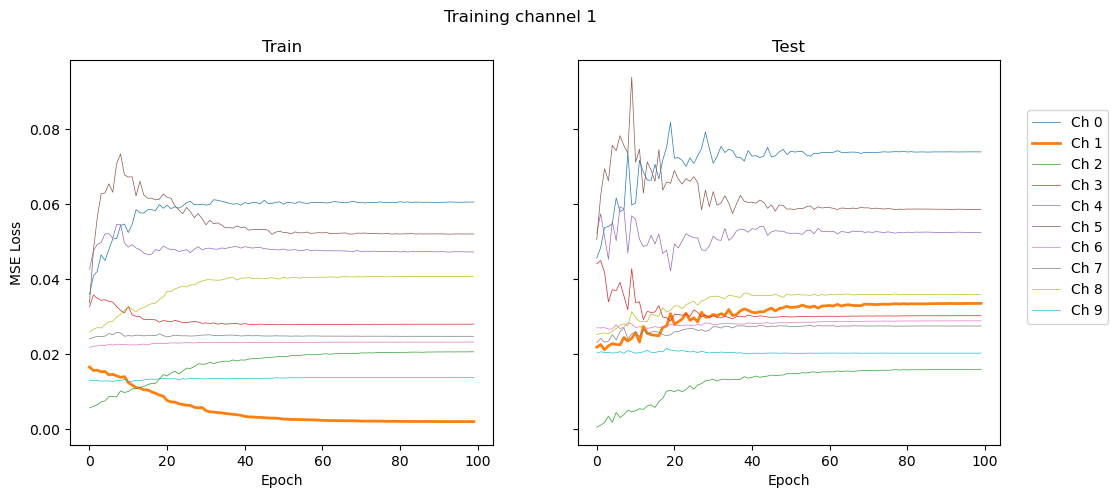

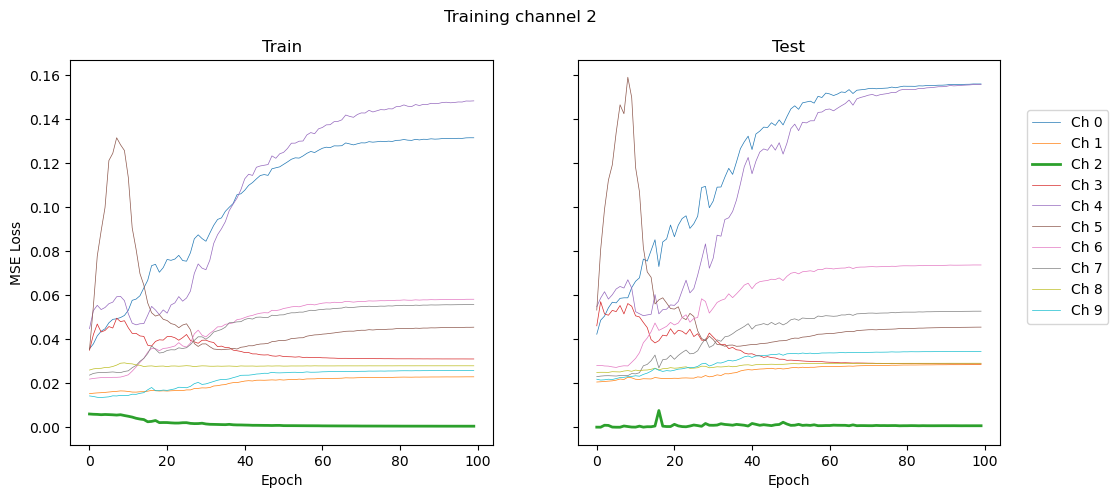

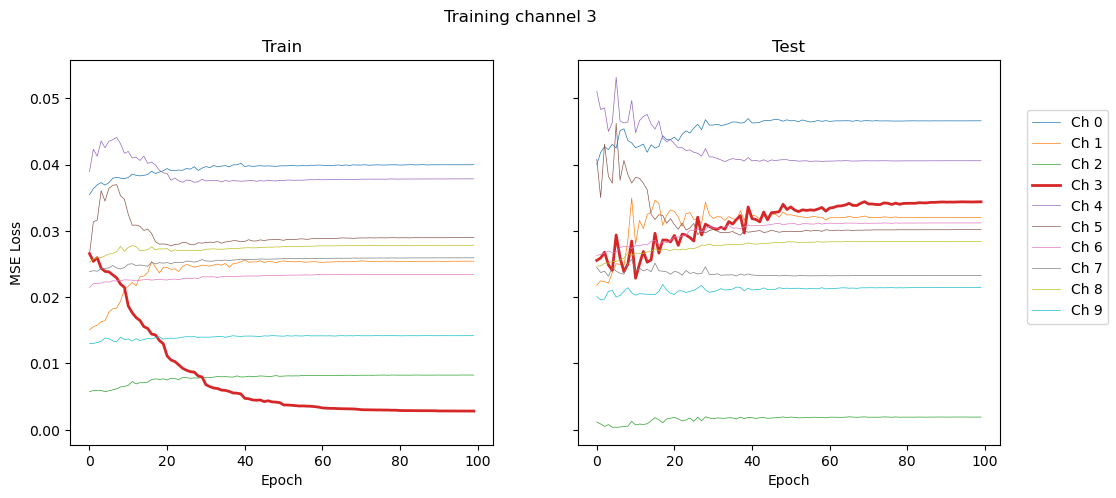

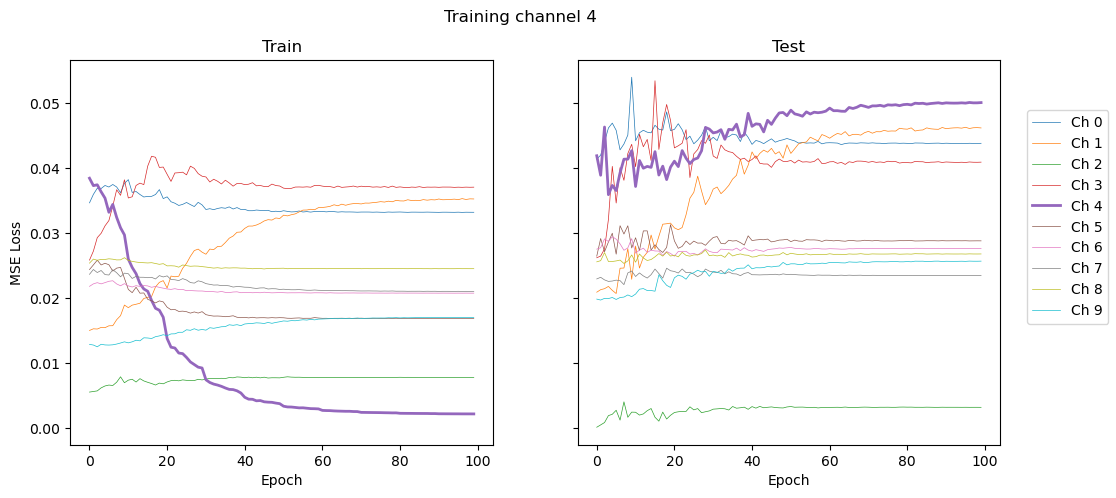

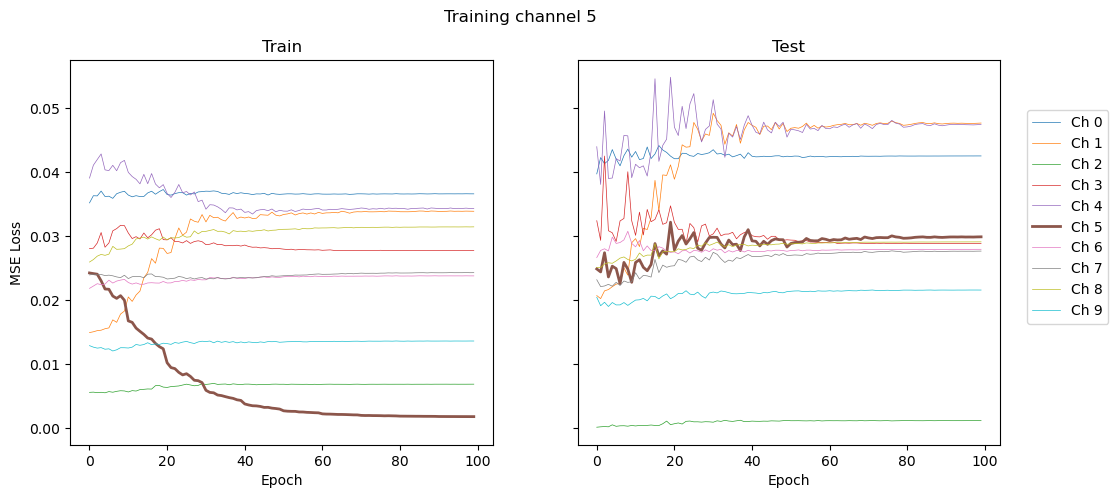

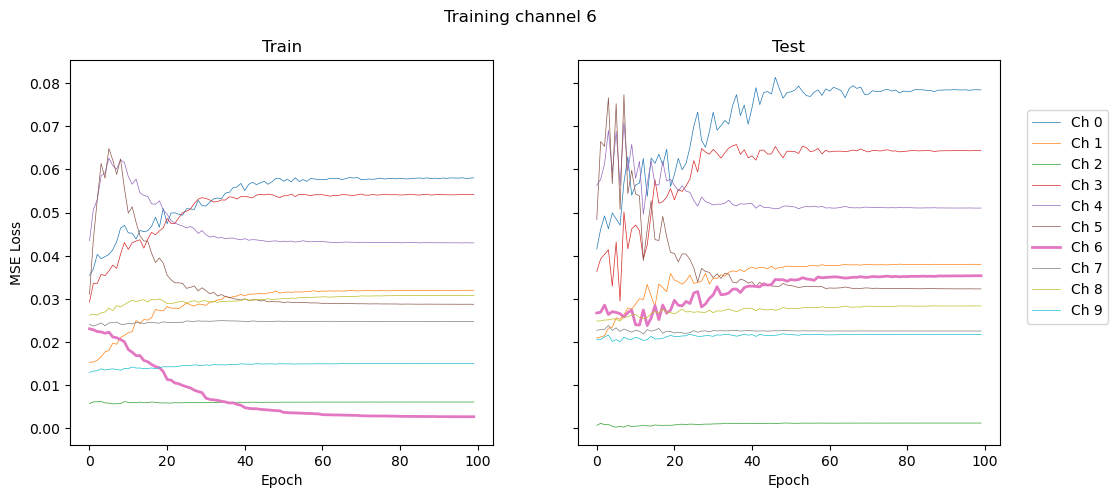

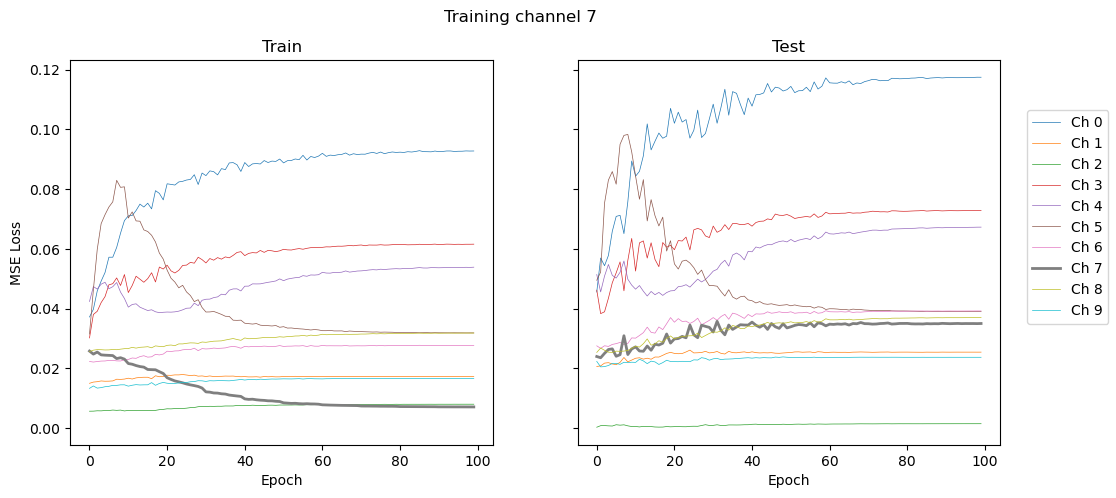

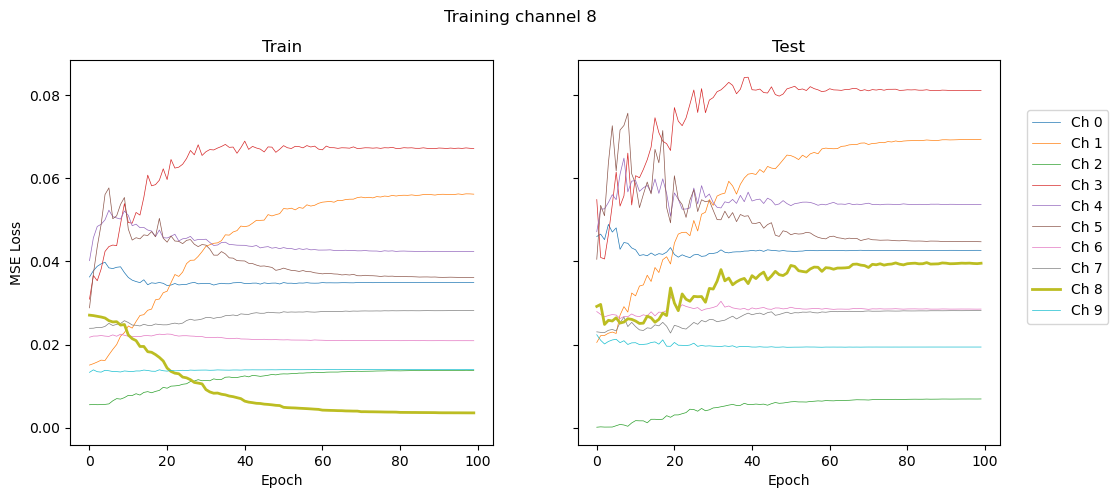

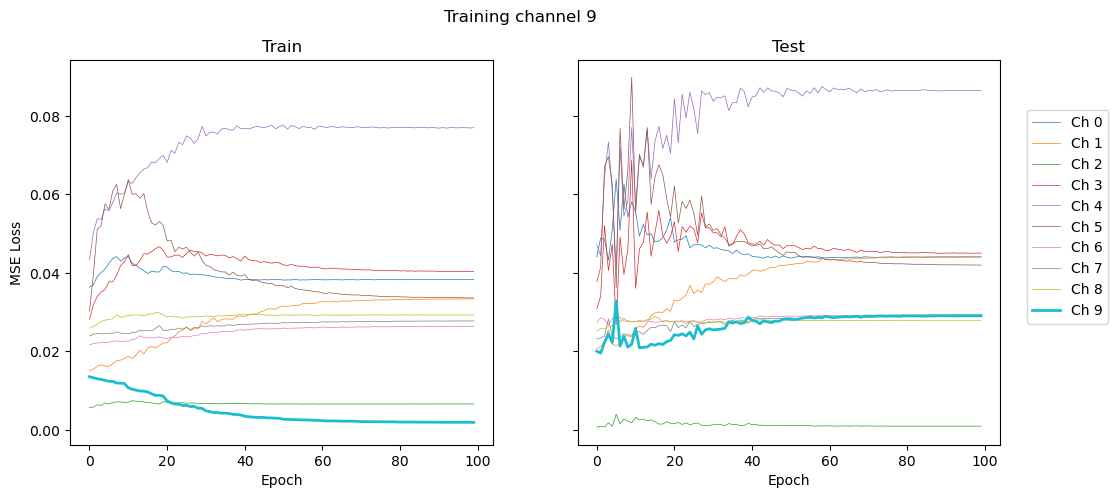

In [5]:
for r in readers:
    r.plot_channel_training()